# BB1000 Lecture 7: Visualization (`matplotlib`)
By Josefine H. Andersen

Several example data shamelessly stolen from
Lin et al. (2022). *An Introduction to Python Programming for Scientists and Engineers*. Cambridge: Cambridge University Press. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Case 1: Line plots

The basic syntax of the `plot()` function is `plot(x, y)`. It produces an (x, y) line plot.

`x` and `y` are *positional* input parameters and must be written in the correct order in the `plot()` function. 

`x` and `y` can be of type `list` or `numpy.array`.

The dimensions of `x` and `y` must match.

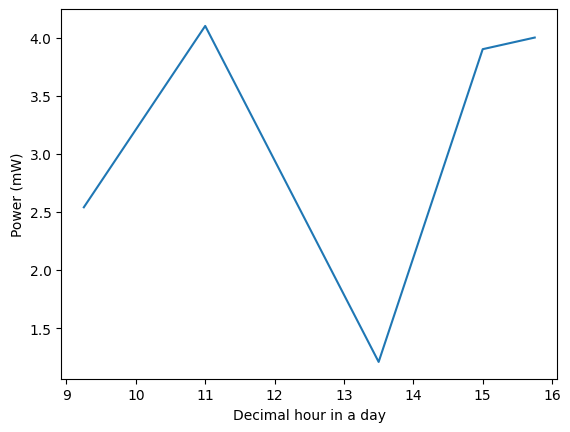

In [2]:
# power consumption measured at points in time
decimal_hour = np.array([9.25, 11, 13.5, 15, 15.75]) # we define our x-variable as an np.array
power = np.array([2.54, 4.10, 1.21, 3.90, 4.00]) # we define our x-variable as an np.array

plt.plot(decimal_hour, power) # make a 2D (x,y) line plot with default parameters. A line plot plots the (x,y) data points
                              # and connects them with a line (each point is connected to its direct 'neighbours' in the array
plt.xlabel('Decimal hour in a day') # set the label for the x-axis (is shown below the x-axis)
plt.ylabel('Power (mW)') # set the label for the y-axis (is shown vertically beside the y-axis, which is to the left in the figure

plt.show() # this call is not necessary in Jupyter, but in many other cases it is. Make a habit of calling it

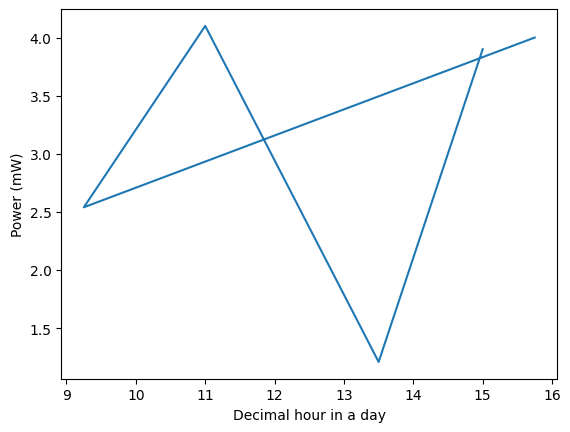

In [3]:
# power consumption measured at points in time
decimal_hour = np.array([9.25, 11, 13.5, 15, 15.75])
power = np.array([2.54, 4.10, 1.21, 3.90, 4.00])

# The plot() function is sensitive to the ordering of the x-data. Here is an example on how it will look if
# the x-values are not listed in increasing/decreasing order

# We first rearrange the elements of our x- and y-values using "slicing" of the arrays
decimal_hour = np.append(decimal_hour[4:], # this slice contains the elements from (and including) index 4 and until the end of the array
                         decimal_hour[:4]) # this slides contains the elements from the start of the array until (but excluding) index 4
power = np.append(power[4:], power[:4]) # we do the same reordering as for the x-values

plt.plot(decimal_hour, power)
plt.xlabel('Decimal hour in a day')
plt.ylabel('Power (mW)')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

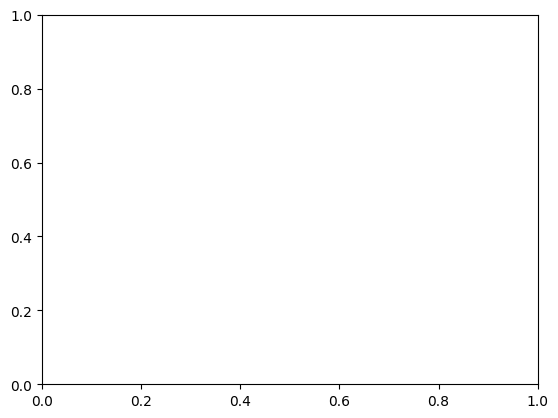

In [4]:
# power consumption measured at points in time
decimal_hour = np.array([9.25, 11, 13.5, 15, 15.75])
power = np.array([2.54, 4.10, 1.21, 3.90, 4.00])

# THIS CODE IS BUGGED
# This illustrates what happens if the x- and y-arrays do not contain the same number of elements
# -- look at the very last line of the error message

decimal_hour = decimal_hour[:-1] # using slicing, we remove the last element of the x-variable array. 
                                 # The minus sign indicates that we "count" from the right, i.e. from the end of the array
plt.plot(decimal_hour, power) # this will crash because "decimal_hour" has one less element than "power"
plt.xlabel('Decimal hour in a day')
plt.ylabel('Power (mW)')

plt.show()

## Case 2: Scatter plots
The basic syntax of the scatter() function is `scatter(x, y)`. It produces an (x, y) scatter plot.

`x` and `y` are positional input parameters and are required by the `scatter()` function. 

`x` and `y` can be of type `list` or `numpy.array`.

The dimensions of `x` and `y` must match.

In [ ]:
# power consumption measured at points in time
decimal_hour = [9.25, 11.0, 13.5, 15.0, 15.75] 
power = [2.54, 4.10, 1.21, 3.90, 4.00]

plt.scatter(decimal_hour, power) # make a 2D (x,y) scatter plot with default parameters: A circle will be 
                                 # drawn for each (x,y) data point. The scatter() funcion does not connect the
                                 # points and therefore I DOES NOT CARE ABOUT THE ORDERING OF THE X-VALUES
plt.xlabel('Decimal hour in a day')
plt.ylabel('Power (mW)')

plt.show()

## !!! DO EXERCISES 1 AND 2 !!!

## Case 3: Customized line plots
Link to `plot()` documentation: [pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

Link to `scatter()` documentation: [pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

Link to list of named colors: [named_colors](https://matplotlib.org/stable/gallery/color/named_colors.html)

Link to list of markers: [matplotlib.markers](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)

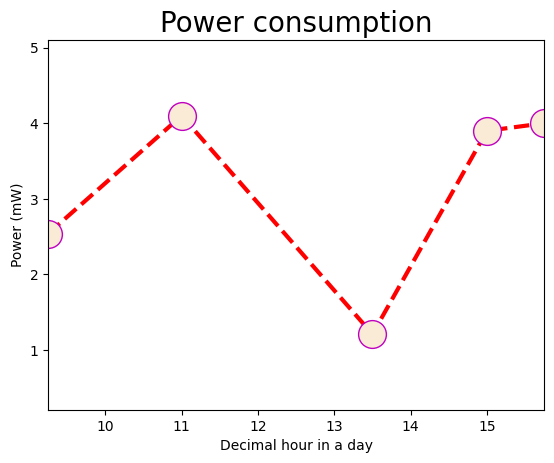

In [5]:
# power consumption measured at points in time
decimal_hour = [9.25, 11, 13.5, 15, 15.75]
power = [2.54, 4.10, 1.21, 3.90, 4.00]

# The first two input parameters are always the x- and y-values (in that order)
# The following input that has a keyword, e.g. "linestyle = " can be given in any order
# after the x, y input
plt.plot(decimal_hour, power, 
         linestyle = '--', # sets the linestyle to dashed. "linestyle" must be set to a string 
         color = 'r', # sets the color of the line to "red". "color" must be set to a string 
         linewidth = 3, # sets the linewidth. "linewidth" takes a float or integer
         marker = 'o', # sets circles as markers at the data points. "marker" must be set to a string
         markersize = 20, # sets the size of the markers to 20
         markerfacecolor = 'antiquewhite', # sets the face color of the marker to "antiquewhite"
         markeredgecolor = 'm' # sets the edge color of the marker to "magenta"
        )
plt.xlabel('Decimal hour in a day')
plt.ylabel('Power (mW)')
plt.title('Power consumption', fontsize = 20) # this sets a title above the plot with font size 20

plt.xlim([min(decimal_hour), max(decimal_hour)]) # Sets the lower and upper limits for the x-axis. 
                                                 # The limits are given as a list [ "lower limit", "upper limit"]
                                                 # In this case, we choose the lowest x-value ("min(decimal_hour)")as the lower limit
                                                 # and the highest x-value ("max(decimal_hour)") as the upper limit
plt.ylim([min(power)-1, max(power)+1]) # Sets the lower and upper limits for the y-axis. Same type of input at plt.xlim()
                                       # In this case, we set the lower limit to the lowest y-value minus 1 ("min(power) - 1")
                                       # and the upper limit to the highest y-value + 1 ("max(power) + 1")

# This is an alternative way to set all limit values at once. The input is one list with values in
# the order [x_min, x_max, y_min, y_max]
# plt.axis([min(decimal_hour), max(decimal_hour), min(power)-1, max(power)+1])


plt.show()

## Case 4: Customized scatter plots

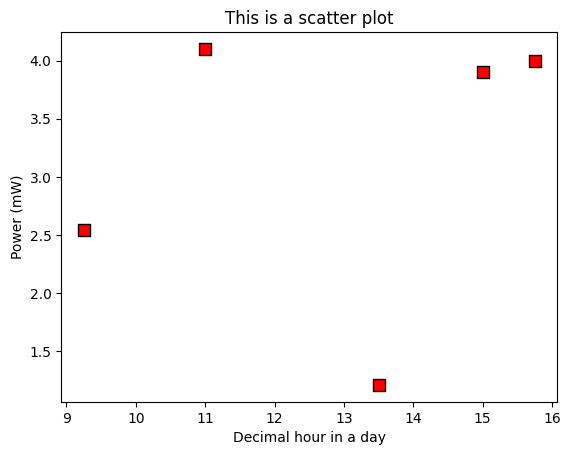

In [6]:
# power consumption measured at points in time
plt.figure()
decimal_hour = [9.25, 11.0, 13.5, 15.0, 15.75]
power = [2.54, 4.10, 1.21, 3.90, 4.00]

# notice in the following that the color and edgecolor have different keywords compared to the plot() function
plt.scatter(decimal_hour, power, # as before, the first input values are x, y
            marker = 's', # sets the marker type to "square"
            color = 'r', # sets the marker color to "red"
            s = 80, # sets the marker size to 80 !!NOTE that this keyword is simply calles "s"
            edgecolor = 'k',  # sets the edgecolor to "black"
           )

plt.xlabel('Decimal hour in a day')
plt.ylabel('Power (mW)')
plt.title('This is a scatter plot') # this sets a title above the plot with default font size

plt.show()

## !!! DO EXERCISES 3 AND 4 !!!

## Case 5: Multiple curves in one plot

In [7]:
x = np.arange(0, 4*np.pi, 0.5) # creates an array with values between 0.0 and 4*pi with 0.5 between the values
cosx = np.cos(x) # creates an array with the cos(x) value for each element in "x"
sinx = np.sin(x) # creates an array with the sin(x) value for each element in "x"

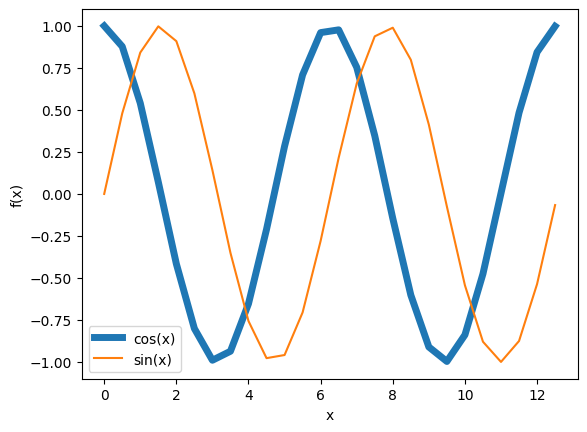

In [8]:
plt.plot(x, cosx, label='cos(x)', linewidth=5) # plots a 2D line plot with custom linewidth and sets the label to "cos(x)"
plt.plot(x, sinx, label='sin(x)') # plots a 2D line plot with default linewidth and sets the label "sin(x)"

plt.xlabel('x') # label for x-axis
plt.ylabel('f(x)') # label for y-axis

plt.legend() # this plots the legend, i.e., a box with the labels we set above in the plot() function

plt.show()

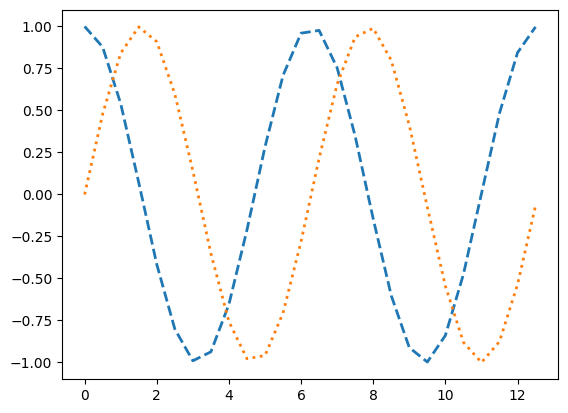

In [9]:
# We can also plot two curves in the same figure with one call of the plot() function
# and set linestyles and colors
# HOWEVER we can not set individual line widths etc
plt.plot(x, cosx, '--', x, sinx, ':',  linewidth = 2)

plt.show()

## Case 6: Multiple independent figures

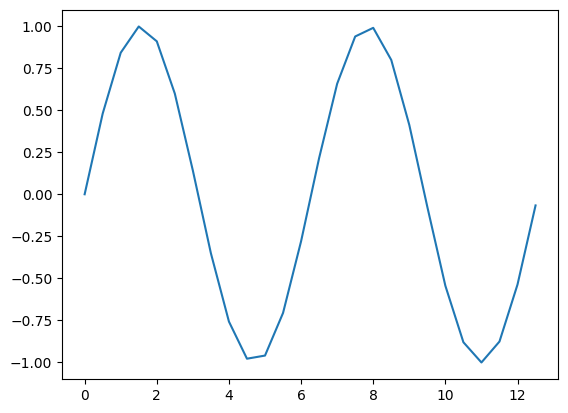

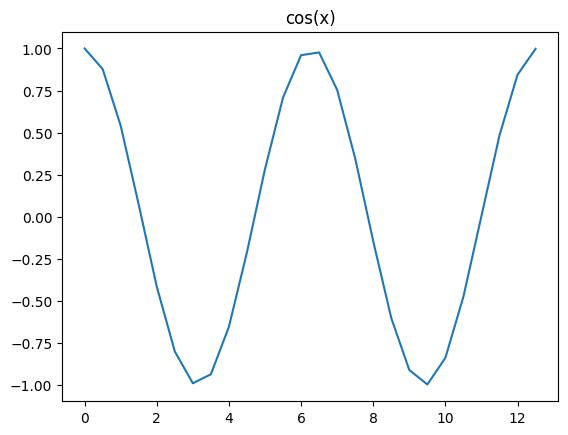

In [10]:
# If we want to plot in different figures, we call the figure() function before calling
# the different plot functions. The integere in the parentheses are simply "tags" to the figures and do
# not define an order

plt.figure(1) # opens a figure with tag "1"
plt.plot(x, cosx) # 2D line plot
plt.title('cos(x)') # sets title to this plot

plt.figure(2) # opens a new figure with tag "2"
plt.plot(x, sinx) # 2D line plot

plt.figure(1) # return to figure "1" -- now this figure will be shown as the bottom one

plt.show()

## Case 6: Subplots
The basic syntax of the subplot() function is `subplot(nrows, ncols, index)`. All subsequent calls to `plt` functions will refer to the subplot with the specified `index`.

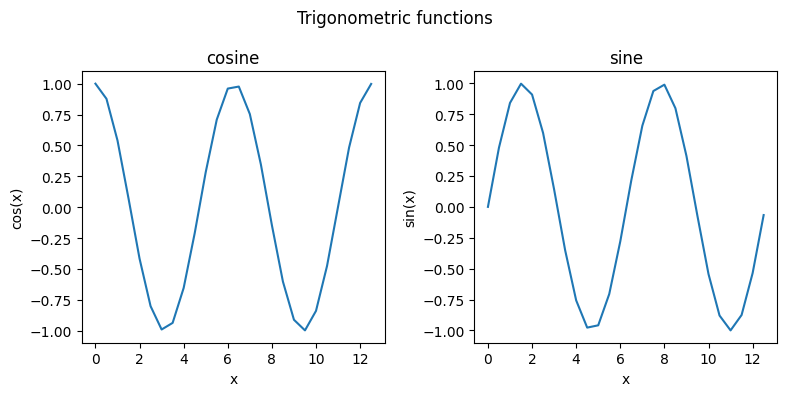

In [11]:
plt.figure(figsize=(8,4)) # the figure() function takes different inputs, for example "figsize". The first number is the
                          # "length" of the figure and the second number is the height of the figure

plt.subplot(1,2,1) # starts a figure with one row, two columns, and we "activate" plot with index "1"
plt.plot(x, cosx) # 2D line plot
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.title('cosine') # sete title for subplot

plt.subplot(1,2,2) # "activate" plot with index "1"
plt.plot(x, sinx) # 2D lineplot
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('sine') # sets title for subplot

plt.suptitle('Trigonometric functions') # sets "super title" i.e. a title for the entire figure

plt.tight_layout() # a quick way to adjust the spacing of the subplots so the layout is nicer

plt.savefig('subplots.png') # a function to save the figure we are currently working at. First input is a string
                            # that gives the name of the figure file. You can choose different file extensions
                            # i.e. .png and .pdf
plt.show()

## !!! DO EXERCISES 5 - 7 !!!